In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
path=r"C:\Users\dhana\Downloads\Dhana_Data_Science\Projects\NLP\complaints-2021-05-14_08_16 .json"
file =open(path)
data=json.load(file)
df=pd.json_normalize(data)

In [2]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [3]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [4]:
df['_source.complaint_what_happened']

0                                                         
1        Good morning my name is XXXX XXXX and I apprec...
2        I upgraded my XXXX XXXX card in XX/XX/2018 and...
3                                                         
4                                                         
                               ...                        
78308                                                     
78309    On Wednesday, XX/XX/XXXX I called Chas, my XXX...
78310    I am not familiar with XXXX pay and did not un...
78311    I have had flawless credit for 30 yrs. I've ha...
78312    Roughly 10+ years ago I closed out my accounts...
Name: _source.complaint_what_happened, Length: 78313, dtype: object

In [5]:
df['_source.complaint_what_happened'][4]

''

In [6]:
df['_source.complaint_what_happened'].isnull().sum()

0

In [7]:
import numpy as np
df['_source.complaint_what_happened']=df['_source.complaint_what_happened'].replace('',np.nan)

In [8]:
(df['_source.complaint_what_happened'].isnull().sum()/df.shape[0])*100

73.09258999144458

In [9]:
df['_source.complaint_what_happened'].isnull().sum()

57241

In [10]:
df=df[~df['_source.complaint_what_happened'].isnull()]

In [11]:
df['_source.complaint_what_happened'].isnull().sum()

0

### Text Preprocessing

In [12]:
import re
def preprocess(raw_text):
    #convert text to lower case
    cleaned_txt=raw_text.lower()
    # remove punctuations
    
    cleaned_txt=(re.sub(r'[^\w\s]',' ',cleaned_txt))
    
     # remove digits 
    cleaned_txt=re.sub(r'\d+','',cleaned_txt)
    
    # remove more spaces
    cleaned_txt=re.sub(r'\s+',' ',cleaned_txt).strip()
    
  
    return cleaned_txt             

In [13]:
df['complaint_what_happened']=df['_source.complaint_what_happened'].apply(preprocess)

In [14]:
df['complaint_what_happened'][:5][1]

'good morning my name is xxxx xxxx and i appreciate it if you could help me put a stop to chase bank cardmember services in i wrote to chase asking for debt verification and what they sent me a statement which is not acceptable i am asking the bank to validate the debt instead i been receiving mail every month from them attempting to collect a debt i have a right to know this information as a consumer chase account xxxx xxxx xxxx xxxx thanks in advance for your help'

In [15]:
import spacy
nlp=spacy.load('en_core_web_sm')
def pos_tag(sentence):
    doc=nlp(sentence)
    lemma=[]
    removed_pos=[]
    for token in doc:
        lemma.append(token.lemma_)
        if token.tag_=='NN':
            removed_pos.append(token.lemma_)
    lemma=" ".join(lemma)      
    removed_pos=" ".join(removed_pos)
    return pd.Series([lemma,removed_pos])      

In [16]:
lemma_pos_df1=df['complaint_what_happened'].apply(lambda x:pos_tag(x))

In [17]:
lemma_pos_df1.columns=['lemmatized','removed_pos']

In [18]:
lemma_pos_df1.head()

,lemmatized,removed_pos
1,good morning my name be xxxx xxxx and I apprec...,morning name stop debt verification statement ...
2,I upgrade my xxxx xxxx card in xx xx and be te...,agent anniversary date agent information order...
10,chase card be report on xx xx however fraudule...,chase card application identity consent credit...
11,on xx xx while try to book a xxxx xxxx ticket ...,ticket offer ticket card information offer min...
14,my grand son give I check for I deposit it int...,son check chase account fund chase bank accoun...


In [19]:
df_clean=pd.concat([df,lemma_pos_df1],axis=1)

In [20]:
df_clean=df_clean[['complaint_what_happened','lemmatized','removed_pos']]

In [56]:
df_clean

,complaint_what_happened,lemmatized,removed_pos
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop debt verification statement ...
2,i upgraded my xxxx xxxx card in xx xx and was ...,I upgrade my xxxx xxxx card in xx xx and be te...,agent anniversary date agent information order...
10,chase card was reported on xx xx however fraud...,chase card be report on xx xx however fraudule...,chase card application identity consent credit...
11,on xx xx while trying to book a xxxx xxxx tick...,on xx xx while try to book a xxxx xxxx ticket ...,ticket offer ticket card information offer min...
14,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,son check chase account fund chase bank accoun...
...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade credit chase bonus ...
78309,on wednesday xx xx xxxx i called chas my xxxx ...,on wednesday xx xx xxxx I call chas my xxxx xx...,credit card provider claim purchase protection...
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk chase bank app chase banking merchant...
78311,i have had flawless credit for yrs i ve had ch...,I have have flawless credit for yrs I ve have ...,credit yrs chase credit freedom balance life p...


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(ngram_range=(1,3),min_df=2,max_df=0.8)

In [58]:
doc_vec=vectorizer.fit_transform(df_clean['removed_pos'])


In [59]:
from sklearn.decomposition import NMF
nmf_model=NMF(n_components=5,random_state=40)
nmf_model.fit(doc_vec)
topic_results=nmf_model.transform(doc_vec)

C:\Users\dhana\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [60]:
topic_results[14]

array([0.01393414, 0.05975535, 0.00527301, 0.        , 0.0015716 ])

In [61]:
df_clean['Topic']=topic_results.argmax(axis=1)

In [62]:
df_clean[['removed_pos','Topic']]

,removed_pos,Topic
1,morning name stop debt verification statement ...,0
2,agent anniversary date agent information order...,0
10,chase card application identity consent credit...,1
11,ticket offer ticket card information offer min...,3
14,son check chase account fund chase bank accoun...,0
...,...,...
78303,chase card customer decade credit chase bonus ...,1
78309,credit card provider claim purchase protection...,1
78310,pay risk chase bank app chase banking merchant...,0
78311,credit yrs chase credit freedom balance life p...,4


In [63]:
df_clean[df_clean['Topic']==0]['removed_pos'][1]

'morning name stop debt verification statement bank debt mail month debt right information consumer chase account advance help'

In [64]:
df_clean[df_clean['Topic']==0]['removed_pos'][78310]

'pay risk chase bank app chase banking merchant merchant communication website merchant consent research phone number information pi merchant account title cycle fraud voip identity report report recourse matter protocol place issue chase app verbiage point app branch chase banking service imply degree entitlement customer service protection chase link risk service concern chase minimum risk banking app public individual identity neighbor television news network risk banking public fraud scamming banking mogul chase recourse action risk extent'

In [65]:
df_clean[df_clean['Topic']==0]['removed_pos'][21]

'payment retailer chase pay chase website scam website confirmation product response order chase information transaction refund bank chase message way transaction contact information recipient message response email transfer website scam email expertise team order refund consumer online support team number email situation department transaction chase information transfer agent call closing script contact number opportunity information information system bank transaction customer service agent information transaction chase system transaction line everything understanding situation call chase chase time agent information bank information information situation department information nothing nature transaction chase information email address banking information system phone transaction responsibility matter process chase information situation way money way business advertising way customer service team'

In [66]:
df_clean[df_clean['Topic']==0]['removed_pos'][14]

'son check chase account fund chase bank account money son check money chase bank money son chase check owner country time date check number claim number chase'

In [67]:
df_clean[df_clean['Topic']==1]['removed_pos']

10       chase card application identity consent credit...
32       chase amazon card catering order funeral amoun...
50       citizen time share nothing refund credit card ...
52       roommate chase debit card license money accoun...
59       chase bonus chase freedom page request time im...
                               ...                        
78294    concert someone risk lot ticket confirmation c...
78295    chase card portal chase price card account cre...
78296    dispute credit card company chase visa purchas...
78303    chase card customer decade credit chase bonus ...
78309    credit card provider claim purchase protection...
Name: removed_pos, Length: 5756, dtype: object

In [68]:
df_clean[df_clean['Topic']==1]['removed_pos'][59]

'chase bonus chase freedom page request time image error t uncommon chase customer support ticket tech team case call lot time situation bunch information com chase com result phone travel center account browser phone application page request time vp customer flight hotel chase sapphire credit credit card purchase story t anything lot inconvenience travel issue asap'

In [69]:
df_clean[df_clean['Topic']==1]['removed_pos'][78296]

'dispute credit card company chase visa purchase dispute t misinformation vendor documentation dispute phone resolution chase service chase branch assistance branch manager matter time chase visa discuss dispute fault chase responsibility failure matter'

In [70]:
df_clean[df_clean['Topic']==2]['removed_pos']

57                       loan modification chase runaround
73       chase reinstatement amount order foreclosure p...
81       loan title chase time resolution time nothing ...
99       name payment loan modification loss mitigation...
127      member auto finance gap insurance waiver cover...
                               ...                        
78244    cfpb law representative bank case circuit cler...
78246    cfpb mortgage loan issue alternative loan sale...
78249    heloc failure notary signing document bank man...
78283    loan file line credit agreement chase straw ma...
78293    attorney bankruptcy copy cease letter cease le...
Name: removed_pos, Length: 3868, dtype: object

In [71]:
df_clean[df_clean['Topic']==2]['removed_pos'][127]

'member auto finance gap insurance waiver coverage time financing agreement premium vehicle chase auto finance vehicle financing agreement option gap insurance provider gap insurance gap waiver addendum insurance agreement chase auto finance deficiency event vehicle chase auto finance vehicle letter vehicle vehicle accident chase gap insurance waiver loss lien vehicle salvage value bank chase commitment deficiency insurance payout balance loan salvage value'

In [72]:
df_clean[df_clean['Topic']==2]['removed_pos'][99]

'name payment loan modification loss mitigation assistance help chase loan forbearance option issue refinancing debt time credit score'

In [73]:
df_clean[df_clean['Topic']==3]['removed_pos'][0:20]

11     ticket offer ticket card information offer min...
15                                               inquiry
23         chase credit card credit report company issue
26     attempt inquiry creditor inquiry report chase ...
83              inquire credit bureau company chase auto
86     student loan account department one contact cr...
100                      chase credit credit none credit
135                      credit inquiry business company
139    complaint company problem lot violation accoun...
143    credit account amazon credit credit reporting ...
152                      inquiry inquiry inquiry inquiry
162    inquiry credit score information inquiry credi...
168    information knowledge phone credit information...
240    copy documentation section section consumer co...
283                           card inquiry credit report
286    chase charge credit report charge card chase l...
325    inquiry credit report credit bureau dispute le...
360    police report case card 

In [39]:
df_clean[df_clean['Topic']==3]['removed_pos'][139]

'complaint company problem lot violation account violation consumer dispute none account law creditor information consumer report violation fcra bureau violation number account payment violation bureau account asap violation fcra law liability remedy law consumer litigation matter chase threat credit company action court'

In [40]:
df_clean[df_clean['Topic']==3]['removed_pos'][360]

'police report case card fraud alert credit report bureau file identity theft trade file report consumer copy passport country year time file month accuracy card month flie attorney office file step chase card account credit report month dispute bureau one chase card company situation everything bureau response time dispute wife someone account name fouth'

In [41]:
df_clean[df_clean['Topic']==4]['removed_pos']

20       summer decline income employment month payment...
30       concern overdraft alert balance fee balance ch...
58       purchase payment closing date statement statem...
82       chase bank credit bureau payment info bill bal...
141      action company individual group chase claim in...
                               ...                        
78265    reporting credit payment chase freedom credit ...
78290    mail authorization option paper chase represen...
78297    balance transfer apr rut debt godsend debt int...
78311    credit yrs chase credit freedom balance life p...
78312    order line credit account payment payment cred...
Name: removed_pos, Length: 2599, dtype: object

In [42]:
df_clean[df_clean['Topic']==4]['removed_pos'][141]

'action company individual group chase claim individual group payment loan claim individual group behalf credit card date payment s claim individual group claim individual group payment payment claim individual group hoa payment payment amount claim individual group amount claim individual group amount claim individual group amount claim individual group payment amount amount amount payment amount claim branch customer service representative advice account email debit card use issue paperwork chase department specialist transaction account information information guy situation know transaction transaction look nd call claim specialist claim specialist supervisor hold rd attempt help money review chase office claim office claim xxxx behalf claim office employee person number file case office phone handful account account end chase checking account description money account course voicemail message return call return call money account time hold xxxx explanation bit money nothing voicema

In [43]:
df_clean[df_clean['Topic']==4]['removed_pos'][20]

'summer decline income employment month payment extension auto loan company chase past request payment extension auto loan payment request month payment extension year situation supervisor avail discussion reason decline reason denial office representative chase week representative representative role matter representative conference call department request information request policy explanation representative letter explanation reason denial policy cfpb help denial payment extension request reason denial'

In [44]:
df_clean[df_clean['Topic']==4]['removed_pos'][58]

'purchase payment closing date statement statement purchase balance statement one statement purchase balance balance xxxx balance difference payment payment chase purchase balance understanding payment excess minimum interest rate balance time chase law profit help problem logic chase advance assistance'

In [74]:
Topic_mapping={
    0:"Bank Account Service",
    1: "Credit or Debit Card",
    2: "Loan/Mortgage",
    3: "Theft/Dispute Reporting",
    4: "Others"

}
df_clean["Topic"]=df_clean['Topic'].map(Topic_mapping)

In [75]:
df_clean

,complaint_what_happened,lemmatized,removed_pos,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop debt verification statement ...,Bank Account Service
2,i upgraded my xxxx xxxx card in xx xx and was ...,I upgrade my xxxx xxxx card in xx xx and be te...,agent anniversary date agent information order...,Bank Account Service
10,chase card was reported on xx xx however fraud...,chase card be report on xx xx however fraudule...,chase card application identity consent credit...,Credit or Debit Card
11,on xx xx while trying to book a xxxx xxxx tick...,on xx xx while try to book a xxxx xxxx ticket ...,ticket offer ticket card information offer min...,Theft/Dispute Reporting
14,my grand son give me check for i deposit it in...,my grand son give I check for I deposit it int...,son check chase account fund chase bank accoun...,Bank Account Service
...,...,...,...,...
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,chase card customer decade credit chase bonus ...,Credit or Debit Card
78309,on wednesday xx xx xxxx i called chas my xxxx ...,on wednesday xx xx xxxx I call chas my xxxx xx...,credit card provider claim purchase protection...,Credit or Debit Card
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk chase bank app chase banking merchant...,Bank Account Service
78311,i have had flawless credit for yrs i ve had ch...,I have have flawless credit for yrs I ve have ...,credit yrs chase credit freedom balance life p...,Others


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec=CountVectorizer()
trains_count=count_vec.fit_transform(df_clean['complaint_what_happened'])
trains_count

<21072x28081 sparse matrix of type '<class 'numpy.int64'>'
	with 2283926 stored elements in Compressed Sparse Row format>

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
trains_count_tfidf =  tfidf_transformer.fit_transform(trains_count)

In [78]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(trains_count_tfidf,df_clean['Topic'],train_size=0.75,random_state=20)

In [87]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
def show_classification_report(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    fig,ax=plt.subplots(figsize=(12,8))
    cm=confusion_matrix(y_test,y_pred)
    cmp=ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    cmp.plot(ax=ax)
    plt.xticks(rotation=80)
    plt.show()

0.6315489749430524
                         precision    recall  f1-score   support

   Bank Account Service       0.59      0.94      0.72      1621
   Credit or Debit Card       0.58      0.75      0.66      1476
          Loan/Mortgage       0.87      0.66      0.75       940
                 Others       0.94      0.02      0.05       651
Theft/Dispute Reporting       0.89      0.11      0.20       580

               accuracy                           0.63      5268
              macro avg       0.78      0.50      0.48      5268
           weighted avg       0.72      0.63      0.57      5268



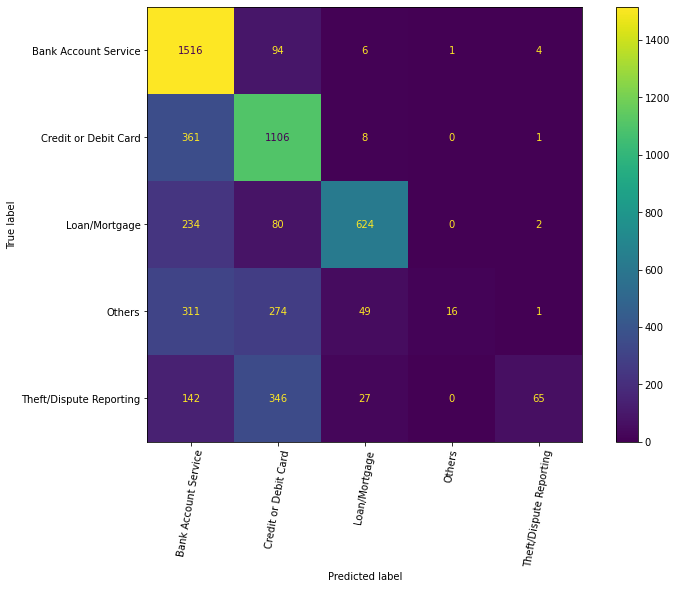

In [88]:
from sklearn.naive_bayes import MultinomialNB
clf =MultinomialNB()
show_classification_report(clf)

C:\Users\dhana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9100227790432802
                         precision    recall  f1-score   support

   Bank Account Service       0.91      0.95      0.93      1621
   Credit or Debit Card       0.90      0.94      0.92      1476
          Loan/Mortgage       0.91      0.92      0.92       940
                 Others       0.94      0.82      0.88       651
Theft/Dispute Reporting       0.88      0.82      0.85       580

               accuracy                           0.91      5268
              macro avg       0.91      0.89      0.90      5268
           weighted avg       0.91      0.91      0.91      5268



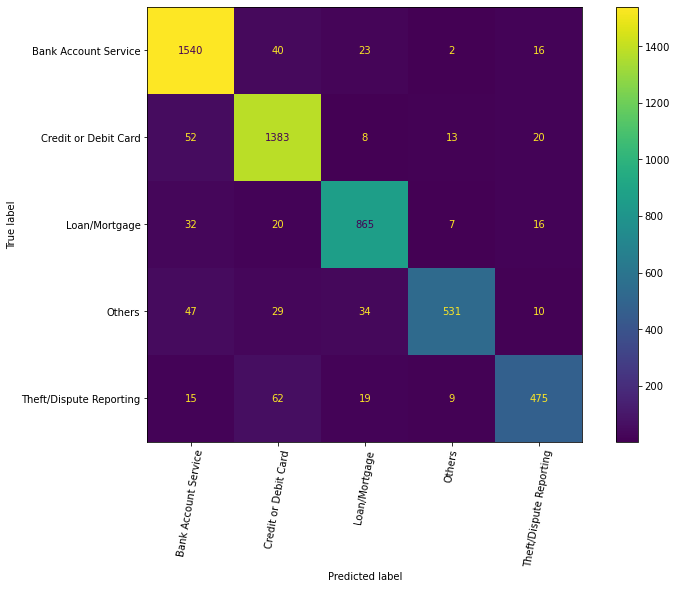

In [90]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
show_classification_report(lr)
import warnings
warnings.filterwarnings('ignore')

0.8096051632498101
                         precision    recall  f1-score   support

   Bank Account Service       0.84      0.82      0.83      1621
   Credit or Debit Card       0.82      0.84      0.83      1476
          Loan/Mortgage       0.83      0.83      0.83       940
                 Others       0.72      0.71      0.72       651
Theft/Dispute Reporting       0.76      0.76      0.76       580

               accuracy                           0.81      5268
              macro avg       0.79      0.79      0.79      5268
           weighted avg       0.81      0.81      0.81      5268



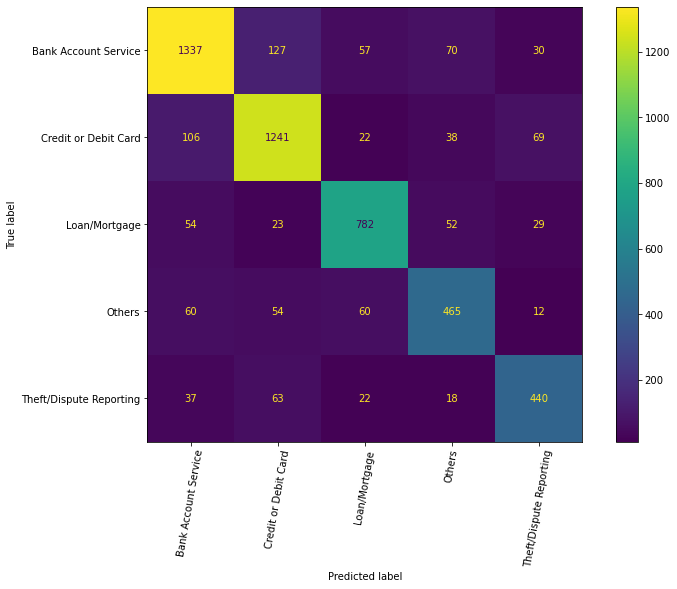

In [91]:
from sklearn.tree import DecisionTreeClassifier
Dt=DecisionTreeClassifier(random_state=30)
show_classification_report(Dt)

0.8149202733485194
                         precision    recall  f1-score   support

   Bank Account Service       0.79      0.92      0.85      1621
   Credit or Debit Card       0.79      0.90      0.84      1476
          Loan/Mortgage       0.86      0.85      0.86       940
                 Others       0.88      0.42      0.57       651
Theft/Dispute Reporting       0.88      0.68      0.77       580

               accuracy                           0.81      5268
              macro avg       0.84      0.76      0.78      5268
           weighted avg       0.82      0.81      0.81      5268



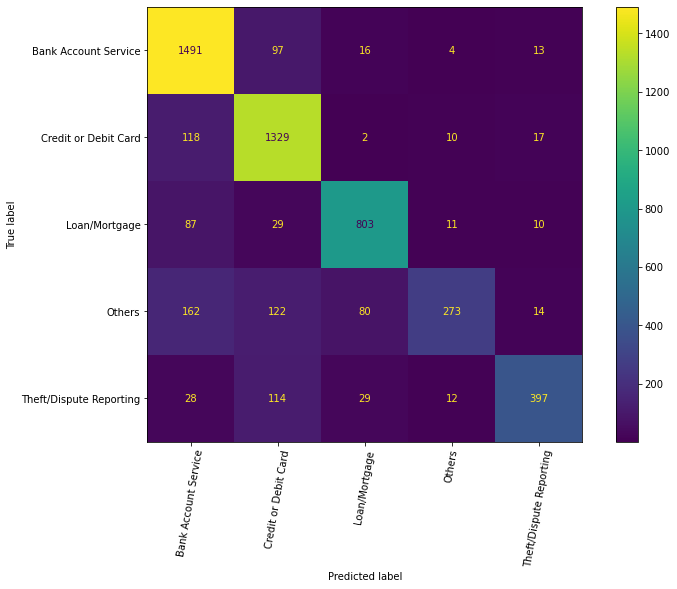

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
show_classification_report(rf)

In [93]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=5,shuffle=True,random_state=40)


In [97]:
from sklearn.model_selection import GridSearchCV
def grid_search(model,folds,params,scoring):
    grid_search=GridSearchCV(model,cv=folds,param_grid=params,scoring=scoring,n_jobs=-1,verbose=1)
    return grid_search

In [105]:
def best_score_params(model):
    model.fit(X_train,y_train)
    print("best score:",model.best_score_)
    print("best_params:",model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
best score: 0.7489237502953319
best_params: {'alpha': 0.01}
Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.7593014426727411
                         precision    recall  f1-score   support

   Bank Account Service       0.77      0.84      0.80      1621
   Credit or Debit Card       0.74      0.77      0.76      1476
          Loan/Mortgage       0.80      0.81      0.81       940
                 Others       0.73      0.55      0.63       651
Theft/Dispute Reporting       0.72      0.64      0.68       580

               accuracy                           0.76      5268
              macro avg       0.75      0.72      0.73      5268
           weighted avg       0.76      0.76      0.76      5268



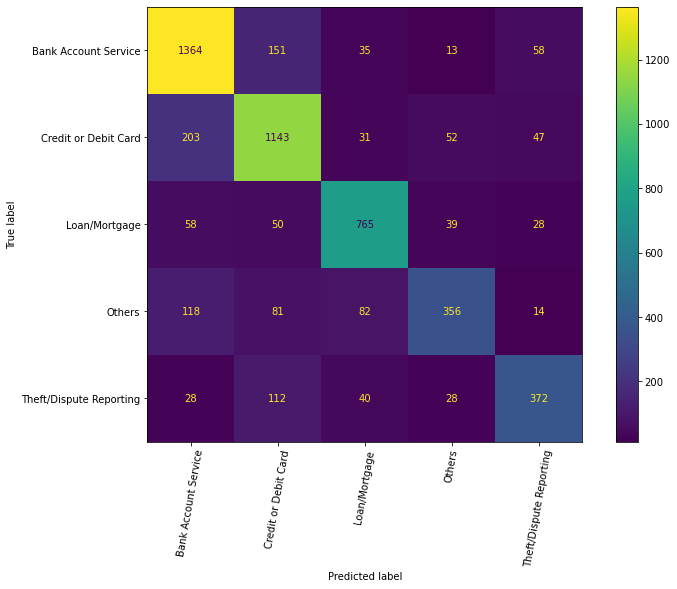

In [106]:
mn=MultinomialNB()
mn_params={
    'alpha':(0.1,0.01,0.001,0.0001)
}

mn_grid_search=grid_search(mn,folds,mn_params,scoring=None)
best_score_params(mn_grid_search)
show_classification_report(mn_grid_search)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
best score: 0.9307141426963907
best_params: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
0.932422171602126
                         precision    recall  f1-score   support

   Bank Account Service       0.94      0.95      0.95      1621
   Credit or Debit Card       0.94      0.93      0.94      1476
          Loan/Mortgage       0.93      0.96      0.94       940
                 Others       0.93      0.91      0.92       651
Theft/Dispute Reporting       0.89      0.88      0.88       580

               accuracy                           0.93      5268
              macro avg       0.93      0.92      0.93      5268
           weighted avg       0.93      0.93      0.93      5268



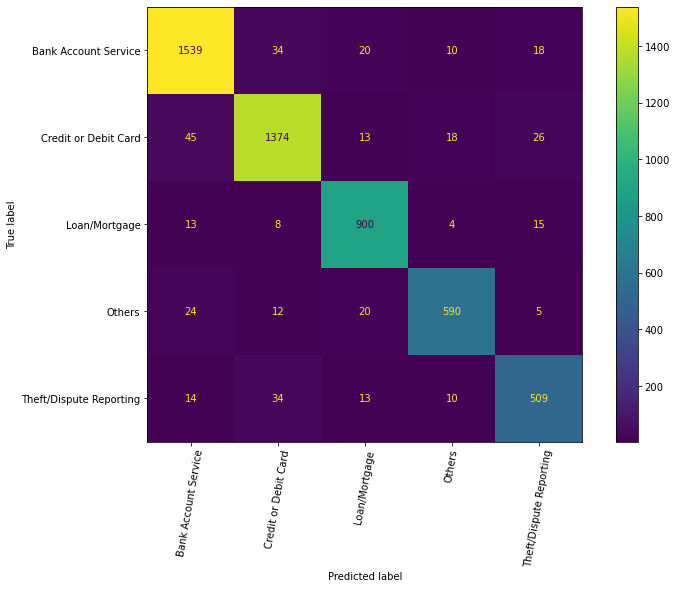

In [109]:
lr=LogisticRegression()
lr_params={
    'C':[0.01,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear','newton-cg','saga']
}
lr_grid_search=grid_search(lr,folds,lr_params,scoring=None)
best_score_params(lr_grid_search)
show_classification_report(lr_grid_search)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
best score: 0.9503147347875845
best_params: {'max_depth': 20, 'min_samples_leaf': 30}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
0.8185269552012149
                         precision    recall  f1-score   support

   Bank Account Service       0.83      0.86      0.85      1621
   Credit or Debit Card       0.85      0.85      0.85      1476
          Loan/Mortgage       0.80      0.86      0.83       940
                 Others       0.79      0.66      0.72       651
Theft/Dispute Reporting       0.77      0.74      0.75       580

               accuracy                           0.82      5268
              macro avg       0.81      0.79      0.80      5268
           weighted avg       0.82      0.82      0.82      5268



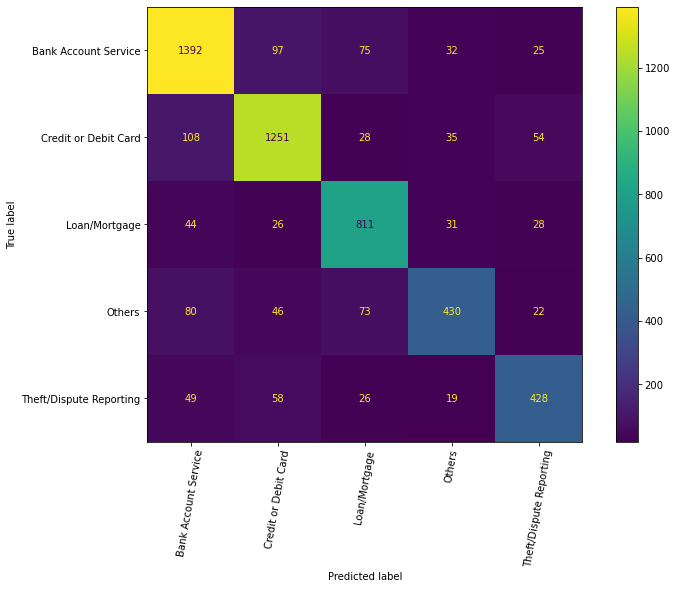

In [112]:
dt=DecisionTreeClassifier()
dt_params={
    'max_depth':[5,10,20,30],
    'min_samples_leaf':[5,10,20,30]
}
dt_grid_search=grid_search(dt,folds,dt_params,scoring='roc_auc_ovr')
best_score_params(dt_grid_search)
show_classification_report(dt_grid_search)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score: 0.9726815314590652
best_params: {'max_depth': 40, 'min_samples_leaf': 5, 'n_estimators': 700}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
0.7947987851176918
                         precision    recall  f1-score   support

   Bank Account Service       0.76      0.94      0.84      1621
   Credit or Debit Card       0.76      0.90      0.82      1476
          Loan/Mortgage       0.86      0.83      0.85       940
                 Others       0.93      0.33      0.49       651
Theft/Dispute Reporting       0.89      0.58      0.71       580

               accuracy                           0.79      5268
              macro avg       0.84      0.72      0.74      5268
           weighted avg       0.81      0.79      0.78      5268



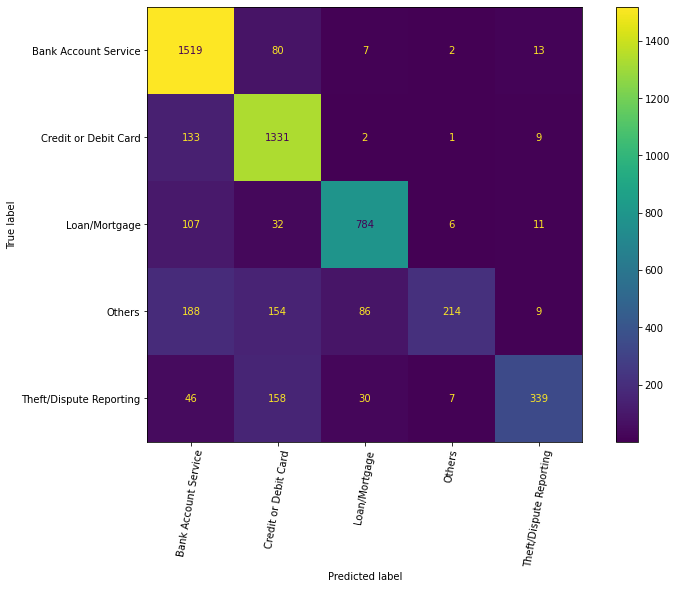

In [119]:
rf =RandomForestClassifier(random_state=40,n_jobs=-1,oob_score=True)
rf_params={
    'max_depth':[5,10,20,3040],
    'min_samples_leaf':[5,10,20,30],
    'n_estimators':[100,200,300,400,500,600,700]
}
rf_gridsearch=grid_search(rf,folds,rf_params,scoring='roc_auc_ovr')
best_score_params(rf_gridsearch)
show_classification_report(rf_gridsearch)

In [118]:
complain = [input("enter ypur complain: ")]
complain_vec = count_vec.transform(complain)
complain_vec_tfidf = tfidf_transformer.transform(complain_vec)
preditction = lr_grid_search.predict(complain_vec_tfidf)
print("\n\n")
print("Complain is categorized as {}".format(preditction[0]))


enter ypur complain: complaint company problem lot violation account violation consumer dispute none account law creditor information consumer report violation fcra bureau violation number account payment violation bureau account asap violation fcra law liability remedy law consumer litigation matter chase threat credit company action court



Complain is categorized as Theft/Dispute Reporting
